# BBM 467 : Data Intensive Applications
## Small Data Science Project
### Things to consider in cross validation and resampling when dealing with Imbalanced Data : What is the right way?
### Uğurcan ERDOĞAN - Alperen Berk IŞILDAR

### PROBLEM DEFINITION :


In this project, we will examine the correct use of cross validation and random sampling techniques.

Actually, we have to follow the steps below in order:

- Data Collection
- Data Preprocessing and Cleaning
- Data Exploration
- Feature Engineering
- Predictive Modelling
- Data Visualization

But since our aim is to show the correct usage of these techniques, we will only focus on the **data visualization**, **feature engineering** and **predictive modeling** steps in our blog post.

In [1]:
# Importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Util functions

In [2]:
from sklearn.decomposition import PCA
# Util function for plotting multi-dimensional data on 2d space. (PCA)
def plot_2d_space(X, y, label):
    pca = PCA(n_components=2)
    X_new = pca.fit_transform(X)
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X_new[y==l, 0],
            X_new[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Util function for printing score metrics.
def print_metric(y_test,predictions):
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Precision: {round(precision,3)}, Recall: {round(recall,3)}, F1: {round(f1,3)}, Accuracy: {round(accuracy,3)}")

###  1- Data Collection

In this step, we will choose an existing imbalanced dataset.

In [4]:
# # Fetching and reading the data file
# import gdown
#
# url = 'https://drive.google.com/uc?id=1BZKhKC9czS9sKFE-uW5k0xb1GJvLlaMJ'
# output = 'creditcard.csv'
# gdown.download(url, output, quiet=False)

df = pd.read_csv("creditcard.csv")

### About the data...
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. In this dataset, there are pre-transformed transaction data, time and amount values as features. As a result, there is a label according to whether the relevant example is fraud or non fraud. This information is also included in the class column.

- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. We also know that the full meaning of these features is not given in terms of privacy.

- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

- Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

You can access the dataset from this link : [Dataset link](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [5]:
# Data statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No fraud samples make up 99.83 % of the dataset.
Fraud samples make up 0.17 % of the dataset.


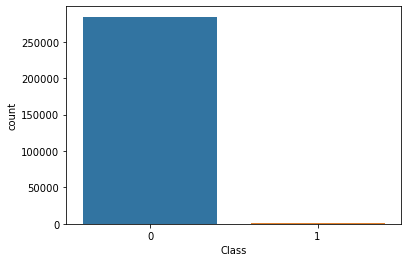

In [6]:
# As you can see, the distribution of classes in our data is very uneven and imbalanced.
print("No fraud samples make up", round(df["Class"].value_counts()[0]/len(df) * 100,2), "% of the dataset.")
print("Fraud samples make up", round(df["Class"].value_counts()[1]/len(df) * 100,2), "% of the dataset.")
sns.countplot(x="Class", data=df);

In [7]:
from sklearn.preprocessing import RobustScaler
# We will use robust scaler. It scales features using statistics that are robust to outliers.
# This scaler removes the median and scales the data according to the quantile range (defaults to IQR: Inter-quartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

robust_scaler = RobustScaler()
df["scaled_time"] = robust_scaler.fit_transform(df["Time"].values.reshape(-1, 1))
df["scaled_amount"] = robust_scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

df.drop(["Time","Amount"], axis=1, inplace=True)

scaled_amount = df["scaled_amount"]
scaled_time = df["scaled_time"]

df.drop(["scaled_amount","scaled_time"], axis=1, inplace=True)
df.insert(0, "scaled_amount", scaled_amount)
df.insert(1, "scaled_time", scaled_time)

# Our scaled features (time, amount) look like this.
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
from sklearn.model_selection import train_test_split
# Splitting test set before doing CV and SMOTE.
X_train, X_test, y_train, y_test = train_test_split(df.drop("Class",
                                                            axis =1),
                                                    df["Class"],
                                                    test_size=0.2,
                                                    stratify=df["Class"],
                                                    random_state=11)

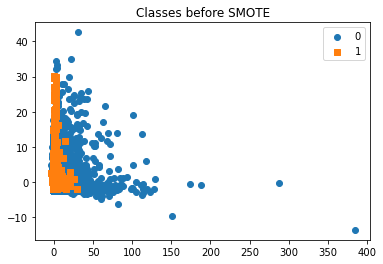

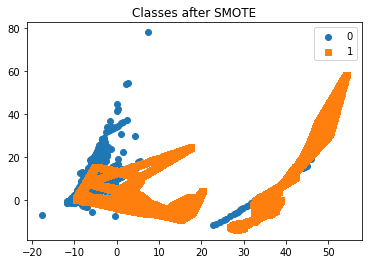

In [9]:
from imblearn.over_sampling import SMOTE

# Original train set distribution
plot_2d_space(X_train, y_train, "Classes before SMOTE")

oversampler = SMOTE()
X_smote, y_smote = oversampler.fit_resample(X_train, y_train)

# Oversampled train set distribution (it won't look like this during cv)
plot_2d_space(X_smote,y_smote, "Classes after SMOTE")

No fraud samples make up 50.0 % of the dataset.
Fraud samples make up 50.0 % of the dataset.


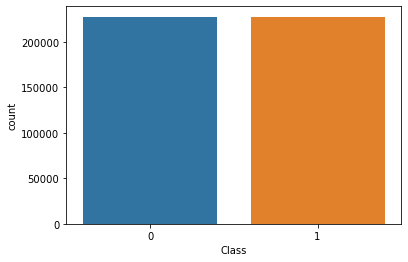

In [10]:
df_smote = pd.concat([X_smote, y_smote], axis=1)
# As you can see, the distribution of classes in our data is even and balanced.
print("No fraud samples make up", round(df_smote["Class"].value_counts()[0]/len(df_smote) * 100,2), "% of the dataset.")
print("Fraud samples make up", round(df_smote["Class"].value_counts()[1]/len(df_smote) * 100,2), "% of the dataset.")
sns.countplot(x="Class", data=df_smote);

In [11]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline

# This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

# Here, there is only a regressor in our pipeline. In this way, after performing random oversampling only once, we will be able to send the relevant subsample data into fit.
pipeline1 = Pipeline([('classifier', LogisticRegression(random_state=11, max_iter=1000))])

# Possible hyperparameters for LogReg.
param_grid = {"classifier__penalty": ['l1', 'l2'],
              'classifier__C':[0.01, 0.1, 1, 10]}

# Choosing best Logistic Regression model with the best hyper parameters.
oversample_before_cv_grid_search = GridSearchCV(estimator=pipeline1,
                                                 param_grid=param_grid,
                                                 scoring='roc_auc',
                                                 cv=stratified_kfold,
                                                 n_jobs=-1)

oversample_before_cv_grid_search.fit(X_train, y_train)
cv_score = oversample_before_cv_grid_search.best_score_
test_score = oversample_before_cv_grid_search.score(X_test, y_test)

print_metric(y_test,oversample_before_cv_grid_search.predict(X_test))
print(f'roc-auc Cross-validation score: {round(cv_score,3)}\nroc-auc Test score: {round(test_score,3)}')

Precision: 0.868, Recall: 0.602, F1: 0.711, Accuracy: 0.999
roc-auc Cross-validation score: 0.982
roc-auc Test score: 0.986


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.pipeline import Pipeline as imbpipeline

# This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

# Here, we prepare the estimator that we will send into GridSearchCV using imbpipeline.
# Using the pipeline, a different subsample will be created by gridsearch in each iteration.
pipeline2 = imbpipeline([('smote', SMOTE()), ('classifier', LogisticRegression(random_state=11,max_iter=1000))])

# Possible hyper parameters for LogReg.
param_grid = {"classifier__penalty": ['l1', 'l2'],
              'classifier__C':[0.01, 0.1, 1, 10]}

# Choosing best Logistic Regression model with the best hyper parameters.
oversample_during_cv_grid_search = GridSearchCV(estimator=pipeline2,
                                                 param_grid=param_grid,
                                                 scoring='roc_auc',
                                                 cv=stratified_kfold,
                                                 n_jobs=-1)

oversample_during_cv_grid_search.fit(X_train, y_train)
cv_score = oversample_during_cv_grid_search.best_score_
test_score = oversample_during_cv_grid_search.score(X_test, y_test)

print_metric(y_test,oversample_during_cv_grid_search.predict(X_test))
print(f'roc-auc Cross-validation score: {round(cv_score,3)}\nroc-auc Test score: {round(test_score,3)}')

Precision: 0.061, Recall: 0.898, F1: 0.114, Accuracy: 0.976
roc-auc Cross-validation score: 0.98
roc-auc Test score: 0.955
